In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [ ]:
from sqlalchemy import create_engine
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [ ]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [ ]:
 # Define the features and the outcome
 X = heartdisease_df.iloc[:, :13]
 y = heartdisease_df.iloc[:, 13]

 # Replace missing values (marked by `?`) with a `0`
 X = X.replace(to_replace='?', value=0)

 # Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
 y = np.where(y > 0, 1, 0)

In [ ]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Apply GMM to the heart disease dataset by setting n_components=2. Get ARI and silhouette scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the previous checkpoint assignments. Which algorithm performs best?

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

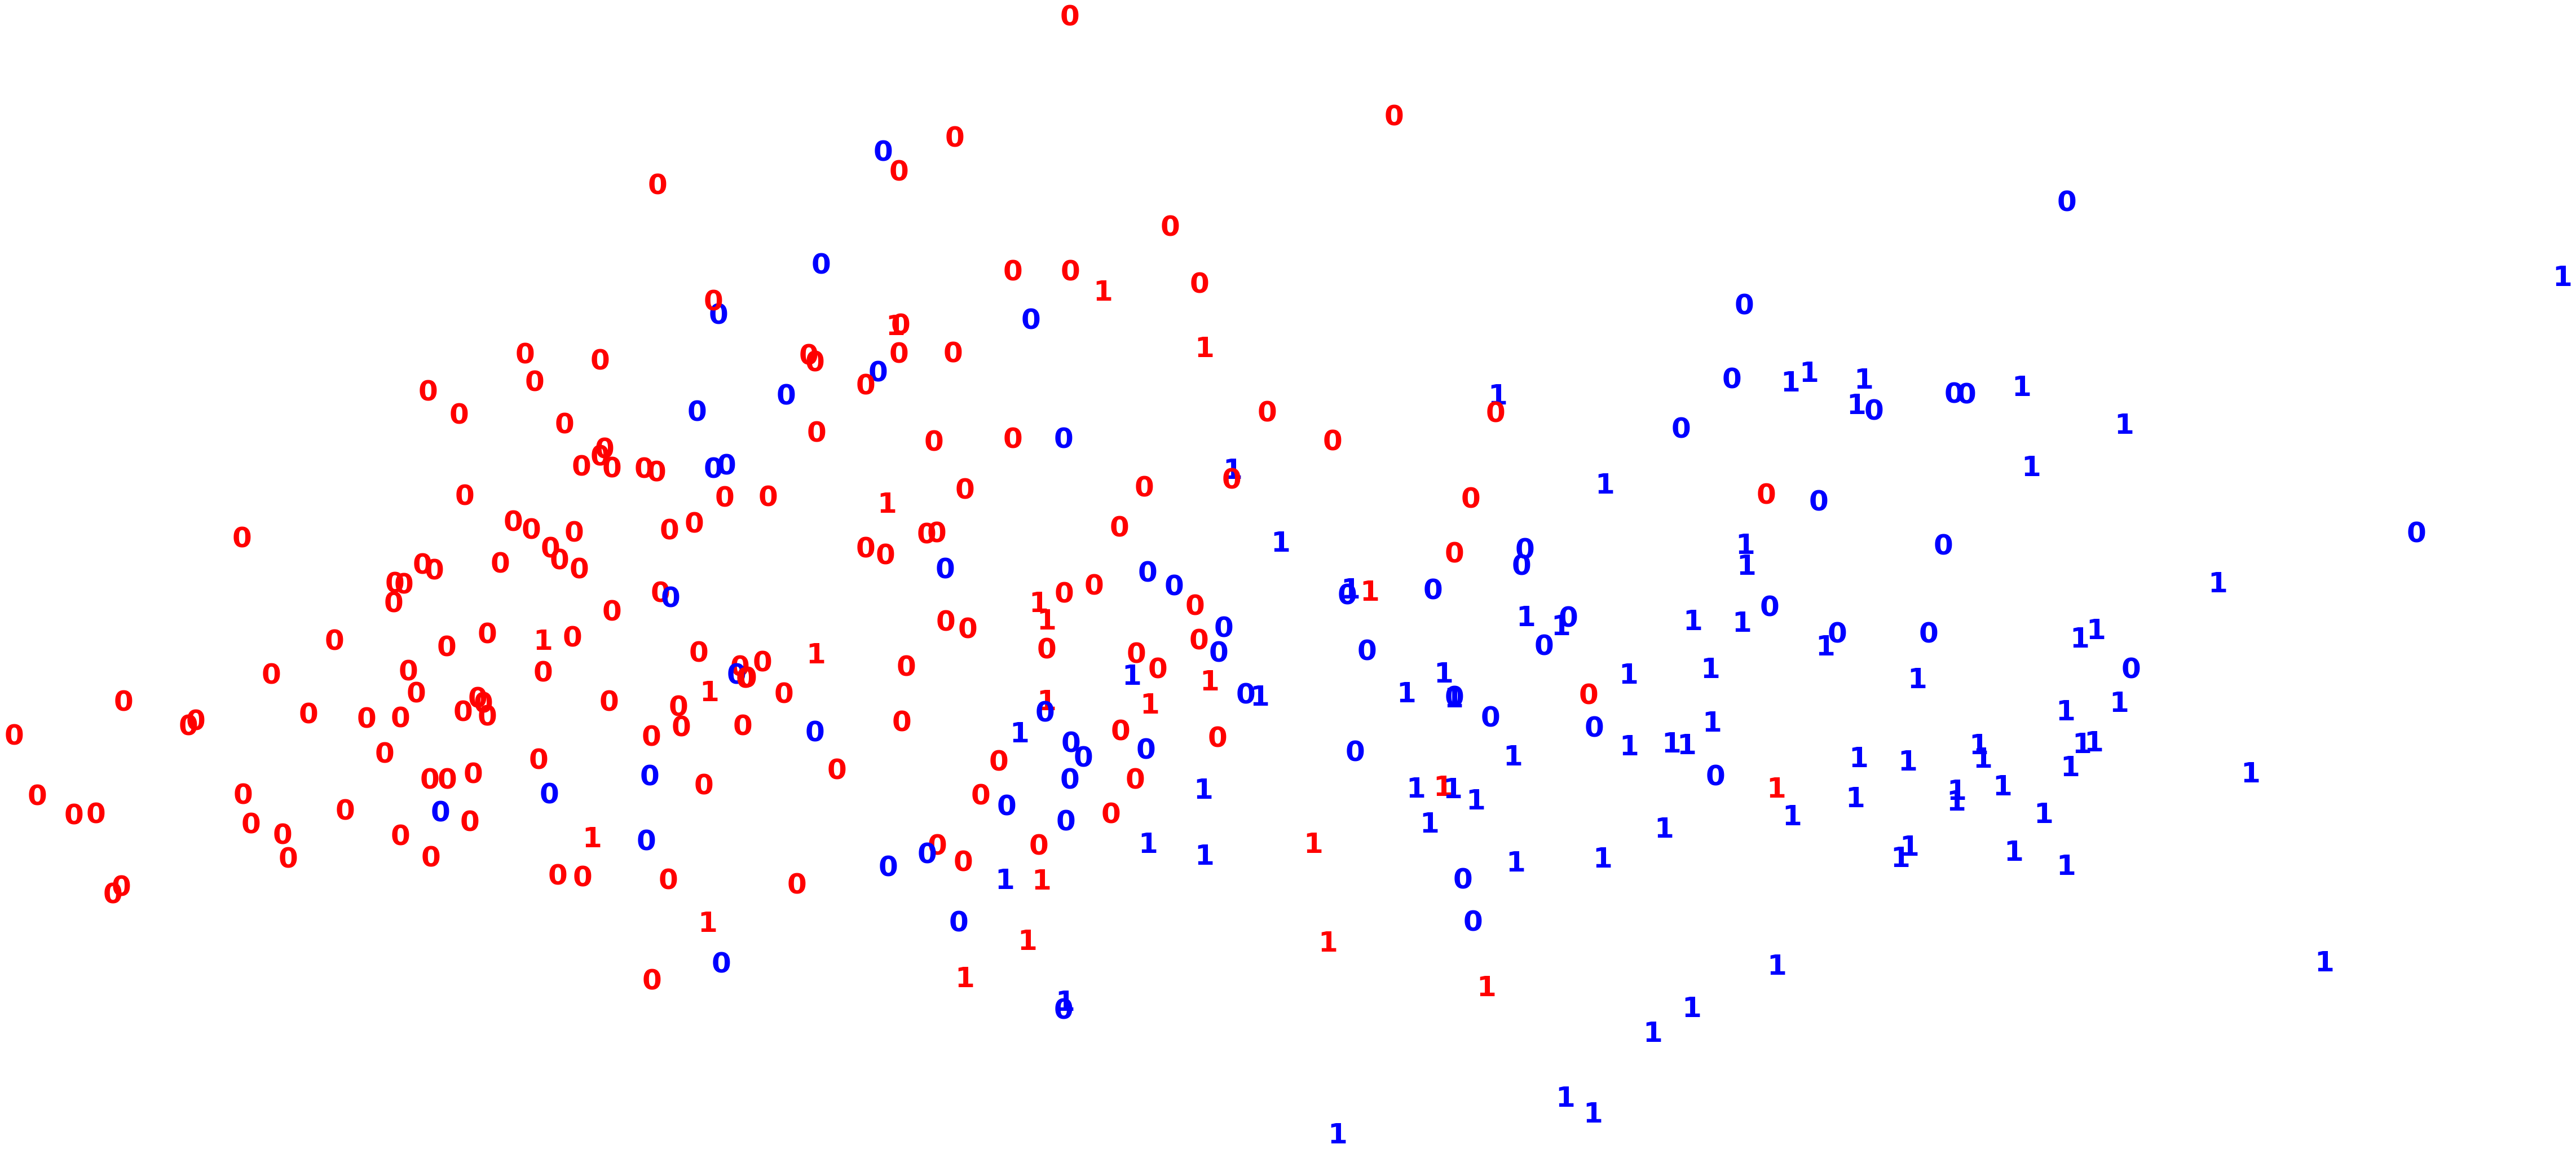

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445


ARI is better then hierarchical clustering ward method, but worse then Knn clustering

GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. There are four types that you can specify:

In [ ]:
cov_type=['full','tied','diag','spherical']
# Defining the agglomerative clustering
for cov in cov_type:
    gmm_cluster = GaussianMixture(n_components=2, covariance_type=cov, random_state=123)

# Fit model
    clusters = gmm_cluster.fit_predict(X_std)
    print("Adjusted Rand Index of the GMM with cov type {} solution: {}"
      .format(cov, metrics.adjusted_rand_score(y, clusters)))
    print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM with cov type full solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445
Adjusted Rand Index of the GMM with cov type tied solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445
Adjusted Rand Index of the GMM with cov type diag solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445
Adjusted Rand Index of the GMM with cov type spherical solution: 0.20765243525722468
The silhoutte score of the GMM solution: 0.12468753110276873


ARI score of covariance type spherical is higher than the others and its silhouette score is lower than the others. The scores of the other covariance types are the same.